Name's: Guy Cohen, Shahar Amram


ID's: 206463606, 205457898

In [161]:

import numpy as np
import matplotlib.pyplot as plt


# read the data
data = np.loadtxt("cancer_data.csv", delimiter=',')

# standardizes the input
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
# A small constant value 1e-8 is added to the standard deviation to avoid division by zero.
data_std[data_std == 0] = 1e-8  # avoid division by zero
data = (data - data_mean) / data_std



In [162]:


# slices the data array to extract all the rows and all the columns except the last one, and assigns it to a new array called X. 
X = data[:, :-1]
# slices the data array to extract all the rows and only the last column, and assigns it to a new array called y
Y = data[:, -1]


print("X mean: ", np.mean(X))
print("X std: ", np.std(X))
print("Y mean: ", np.mean(Y))
print("Y std: ", np.std(Y))

X mean:  5.3873042927192515e-15
X std:  0.9999999999999992
Y mean:  -8.679488226121079e-15
Y std:  1.0000000000000009


In [163]:
# limit the values in the data array to be between -3 and 3. 
data[data > 3] = 3
data[data < -3] = -3

# Add a column of ones to the X matrix
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


In [164]:
def h_theta(theta, x):
    return np.dot(x, theta)


def J_cost(theta, x, y):
    m = len(y)
    h=h_theta(theta, x)
    return (1 / (2 * m)) * np.sum((h - y) ** 2)

def gradient(theta, x, y):
    m = len(y)
    h=h_theta(theta, x)
    return (1 / m) * np.dot(x.T, (h - y))

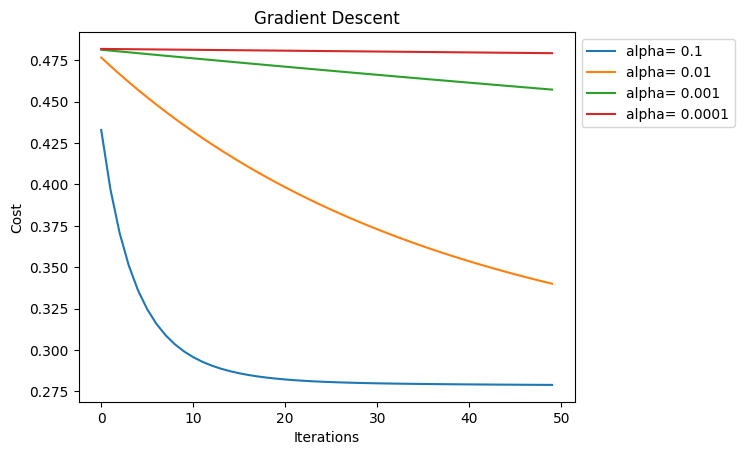

In [165]:

def gradientDescent(x, y, alpha):
    epsilon=1e-8
    delta=1e-8
    num_iters=50
    m, n = x.shape  # number of samples and features
    theta = np.zeros(n)  # initialize model parameters
    cost = np.zeros(num_iters)  # initialize cost history
    for i in range(num_iters):
        grad = gradient(theta, x, y)  # compute gradient
        theta = theta - alpha * grad  # update parameters
        cost[i] = J_cost(theta, x, y)  # compute cost
    return theta, cost




alpha=0.1
theta1, cost1=gradientDescent(X, Y, alpha)
plt.plot( cost1, label=f"alpha= 0.1")


alpha=0.01
theta2, cost2=gradientDescent(X, Y, alpha)
plt.plot( cost2, label=f"alpha= 0.01")


alpha=0.001
theta3, cost3=gradientDescent(X, Y, alpha)
plt.plot( cost3, label=f"alpha= 0.001")

alpha=0.0001
theta4, cost4=gradientDescent(X, Y, alpha)
plt.plot( cost4, label=f"alpha= 0.0001")

plt.legend( bbox_to_anchor=(1, 1) )
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent")
plt.show()



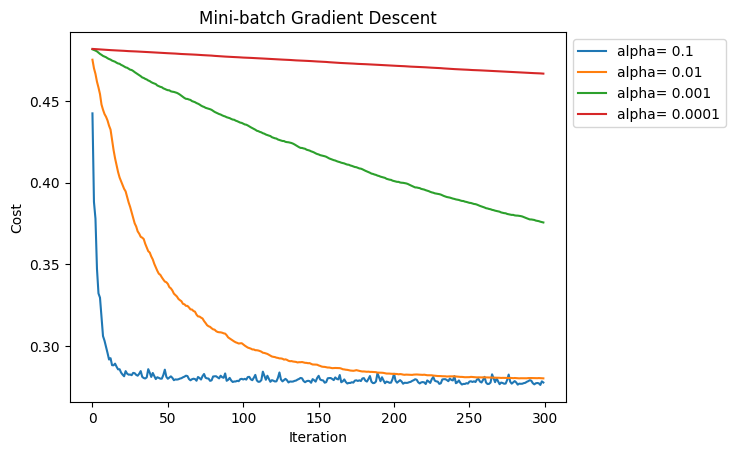

In [166]:


def mini_batches(x, y, alpha, num_iters=300):
    m, n = x.shape
    theta = np.zeros(n)
    N=40 # size of one batch
    T = m// N# T is the number of the batches in the data
    cost=[]
    # Shuffling the data
    indices = np.random.permutation(m)
    x_shuffled, y_shuffled = x[indices], y[indices]
    for i in range(num_iters):
        k = i % T
        xb = x_shuffled[k * N : (k + 1) * N, :]
        yb = y_shuffled[k * N : (k + 1) * N]
        gradient1 = gradient(theta, xb, yb)
        theta = theta - alpha * gradient1
        cost.append(J_cost(theta, X, y))

        if (len(cost) > 1 and abs(cost[-1] - cost[-2]) < 1e-8):# stop condition
            break
        if np.linalg.norm(gradient(theta, X, y)) < 1e-8:# stop condition
            break
    return theta, cost



alpha=0.1
theta1, cost1=mini_batches(X, Y, alpha)
plt.plot( cost1, label=f"alpha= 0.1")

alpha=0.01
theta1, cost1=mini_batches(X, Y, alpha)
plt.plot( cost1, label=f"alpha= 0.01")

alpha=0.001
theta2, cost2=mini_batches(X, Y, alpha)
plt.plot( cost2, label=f"alpha= 0.001")

alpha=0.0001
theta4, cost4=mini_batches(X, Y, alpha)
plt.plot( cost4, label=f"alpha= 0.0001")

# Plot the cost function
plt.legend( bbox_to_anchor=(1, 1) )
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Mini-batch Gradient Descent")
plt.show()


Batch Gradient Descent =>we can see that our graph move directly towards an optimal solution, and he achieve it by less iterations.

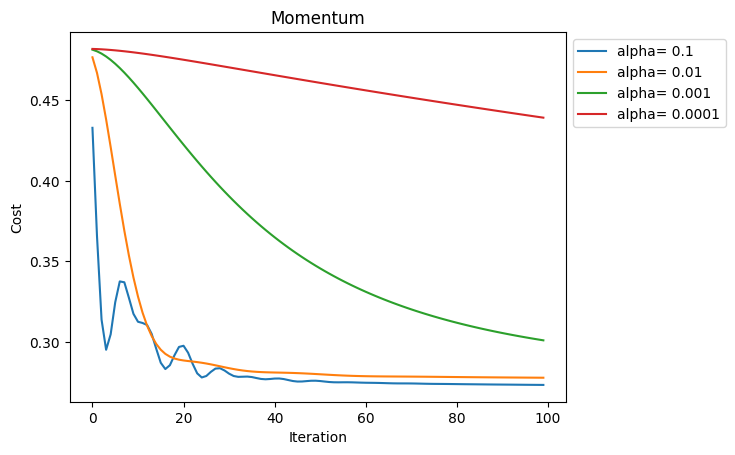

In [167]:
def momentum(x, y, alpha, num_iters=100, beta = 0.9):
    m, n = X.shape
    theta = np.zeros((n))
    cost = []
    V = np.zeros((n))
    indices = np.random.permutation(m)
    x_shuffled, y_shuffled = x[indices], y[indices]
    
    for i in range(num_iters):
        grad = gradient(theta, x_shuffled, y_shuffled)
        V = beta * V + alpha * grad  
        theta = theta - V
        j = J_cost(theta, x_shuffled, y_shuffled)
        cost.append(j)

    return theta, cost


alpha=0.1
theta0, cost0=momentum(X, Y, alpha)
plt.plot( cost0, label=f"alpha= 0.1")


alpha=0.01
theta1, cost1=momentum(X, Y, alpha)
plt.plot( cost1, label=f"alpha= 0.01")

alpha=0.001
theta2, cost2=momentum(X, Y, alpha)
plt.plot( cost2, label=f"alpha= 0.001")

alpha=0.0001
theta4, cost4=momentum(X, Y, alpha)
plt.plot( cost4, label=f"alpha= 0.0001")


plt.legend( bbox_to_anchor=(1, 1) )
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Momentum")
plt.show()


Momentum is an improvement of the GD.
The algorithm also takes into account the gradient values up to now, and makes an average with the momentary gradient. 
The momentum helps to smooth out the fluctuations and to directly towards the minimum of the cost function.
In the above case we can see that there is faster convergence.